In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [92]:
json_df = pd.read_json("dim_customer (1).json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [93]:
# EASY QUESTIONS

In [94]:
# 1. How many unique customers are in the dataset?

len(df['customer_id'].unique())

5191

In [95]:
# 2. What are the different categories of products available? How many unique categories are there?

df.groupby('category').nunique()
print(df['category'].value_counts())
len(df['category'].value_counts())

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64


8

In [97]:
# 3. Which payment method is the most popular? How many times was it used?

In [98]:
df.groupby('payment_method').nunique()
df['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [99]:
# MEDIUM QUESTIONS

In [100]:
# 1. What are the three most popular categories, by total sales?

df["total_sales"] = df["price"] * df["quantity"]

answer = df.groupby('category')['total_sales'].sum(numeric_only=True).sort_values(ascending=False)

answer[0:3]

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [101]:
# 2. What are the total sales attributed to customers over the age of 45?

join_df = pd.merge(left = df, right = json_df, left_on = "customer_id", right_on = "id")
total_sales_sum = join_df[join_df['age'] > 45]['total_sales'].sum()
print(total_sales_sum)

82039768.15


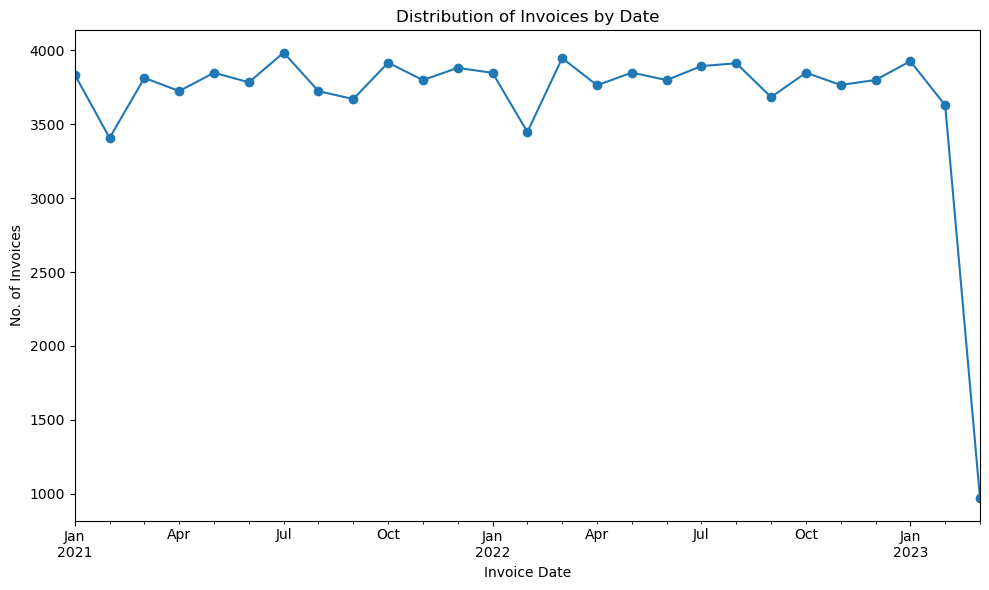

In [78]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

df.set_index('invoice_date', inplace=True)

monthly_counts = df.resample('M').size()

plt.figure(figsize=(10, 6))
monthly_counts.plot(marker='o')
plt.xlabel("Invoice Date")
plt.ylabel("No. of Invoices")
plt.title("Distribution of Invoices by Date")
plt.tight_layout()
plt.show()

In [ ]:
# HARD QUESTIONS

In [102]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade, age range

new_df = join_df[['total_sales','category','age']].copy()
new_df = new_df.dropna()
new_df['decade_range'] = new_df['age'].apply(lambda x: str(int(x//10*10))+"-"+str(int(x//10*10+9)) if pd.notnull(x) else x)
table = pd.pivot_table(new_df, values='total_sales', index=['category'], columns=['decade_range'], aggfunc=len)

table

decade_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,75,475,507,510,462,466,351,174
Clothing,563,3168,3389,3407,3085,3250,2349,1361
Cosmetics,235,1355,1636,1487,1329,1441,942,596
Food & Beverage,225,1342,1506,1567,1301,1430,951,555
Shoes,153,902,1022,1033,875,884,676,380
Souvenir,90,453,498,495,426,445,304,188
Technology,85,458,528,524,388,501,309,178
Toys,166,924,1076,1000,870,942,677,412
